<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Define your transfer function here
# Example: Transfer function G(s) = (s + 2) / (s^2 + 3s + 2)
numerator = [1, 2]  # Coefficients of the numerator (s + 2)
denominator = [1, 3, 2]  # Coefficients of the denominator (s^2 + 3s + 2)

# Create the transfer function
TF = control.TransferFunction(numerator, denominator)

# Convert to State Space
SS = control.tf2ss(TF)
A = SS.A
B = SS.B
C = SS.C
D = SS.D

print("State Space Representation:")
print("A matrix: \n", A)
print("B matrix: \n", B)
print("C matrix: \n", C)
print("D matrix: \n", D)

State Space Representation:
A matrix: 
 [[-3. -2.]
 [ 1.  0.]]
B matrix: 
 [[1.]
 [0.]]
C matrix: 
 [[1. 2.]]
D matrix: 
 [[0.]]


<ipython-input-29-e243c7307d03>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplot[i] = y


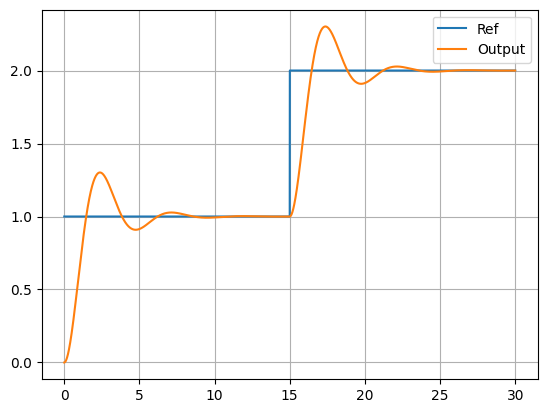

In [29]:
dt = 0.001 # simulation step size
t = np.arange(0,30,dt)
x = np.zeros([A.shape[0],1])

r = 1                  # reference input
kp = 0.01
ki = 0.002
u = 0.0

rplot = np.zeros(t.shape[0])
yplot = np.zeros(t.shape[0])
sum_e = 0

for i in range(t.shape[0]):

  if i >= 15000:
    r = 2

  # state space model
  xdot=np.dot(A, x)+np.dot(B,u)
  x = x + xdot*dt
  y = np.dot(C,x)+np.dot(D,u)

  # controller
  e = r - y
  u = kp * e + ki * sum_e
  sum_e = sum_e + e

  yplot[i] = y
  rplot[i] = r

plt.plot(t,rplot)
plt.plot(t,yplot)
plt.grid()
plt.legend(['Ref','Output'])
plt.show()